In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Reviews.csv')
UsefulFeatures=['Score','Text']
df=df[UsefulFeatures]
df.to_csv('ModifiedReviews.csv',index=False)

df=pd.read_csv('ModifiedReviews.csv')
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


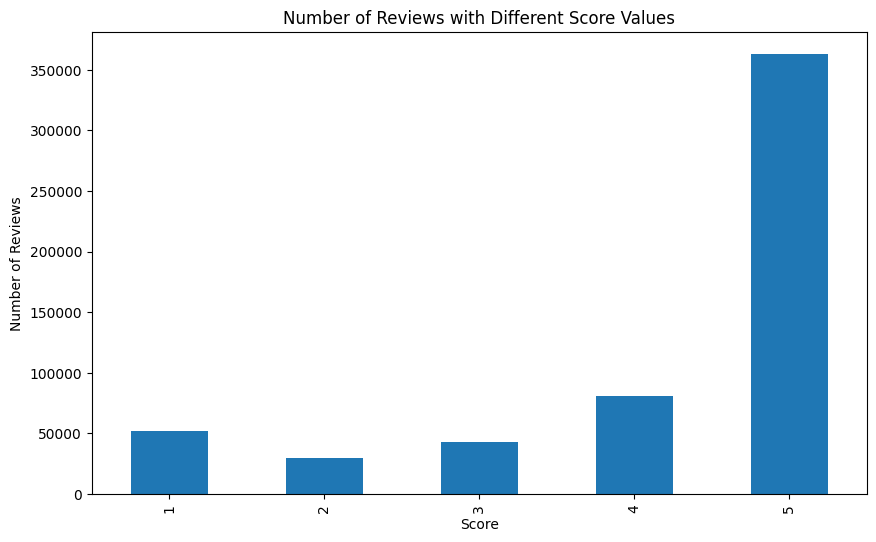

In [11]:
#Lets check what are the different score values present in the dataset
score_counts = df['Score'].value_counts().sort_index()
print(df['Score'].value_counts())

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()

#We can see that most of the reviews have 5 stars at a very high rate and others are comparatively very low
#This can cause overfitting to predict 5 stars when used to produce output. So, lets clear a large no of 5 star reviews


Score
5    217873
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


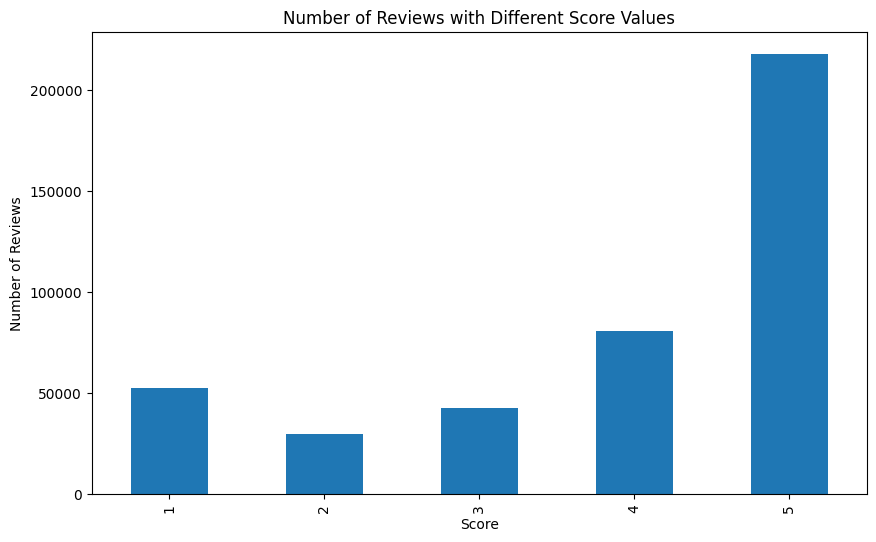

In [12]:
five_star_reviews = df[df['Score'] == 5]

# Randomly sample 40% of the 5-star reviews
sampled_five_star_reviews = five_star_reviews.sample(frac=0.6, random_state=1)


non_five_star_reviews = df[df['Score'] != 5]

# Combine the sampled 5-star reviews with the rest of the reviews
trimmed_df = pd.concat([non_five_star_reviews, sampled_five_star_reviews])

# Verify the result
print(trimmed_df['Score'].value_counts())



#Lets check the same plot for this new dataframe
score_counts = trimmed_df['Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()

#This wraps up our data preparation part as the data is complete with no missing values and is ready to be used for training the model


In [13]:
#Lets save this dataframe to the csv file
trimmed_df.to_csv('ModifiedReviews.csv', index=False)

In [14]:
#Apparently Even this dirtors the data a lot towards 5 rating
#So, now we will utilize similar no of samples of each rating to make the data more balanced
#We will make each rating have 10000 samples
sampled_one_star_reviews = df[df['Score'] == 1].sample(n=29000, random_state=1)
sampled_two_star_reviews = df[df['Score'] == 2].sample(n=29000, random_state=1)
sampled_three_star_reviews = df[df['Score'] == 3].sample(n=29000, random_state=1)
sampled_four_star_reviews = df[df['Score'] == 4].sample(n=29000, random_state=1)
sampled_five_star_reviews = df[df['Score'] == 5].sample(n=29000, random_state=1)

# Combine the sampled reviews
BalancedDf=pd.concat([sampled_one_star_reviews, sampled_two_star_reviews, sampled_three_star_reviews, sampled_four_star_reviews, sampled_five_star_reviews])
print(len(BalancedDf))
BalancedDf.to_csv('ModifiedReviews.csv', index=False)


145000


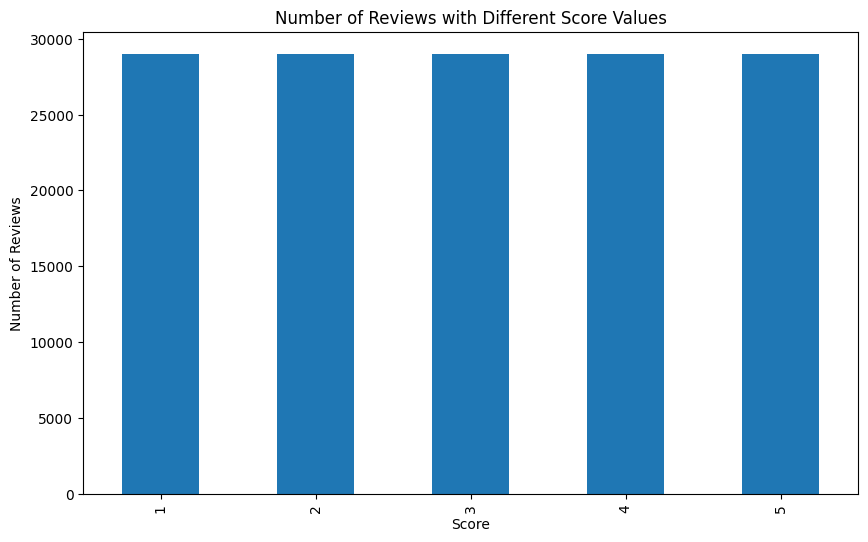

In [15]:
df=pd.read_csv('ModifiedReviews.csv')
score_counts = df['Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()